In [3]:
import os
import sys

os.environ['HOME'] = "D:\science"
sys.path.append('../..')
import numpy as np
import matplotlib.pyplot as plt

from lexsubgen.prob_estimators.xlmr_estimator import XLMRProbEstimatorMultimasked
from lexsubgen.prob_estimators.combiner import AverageCombiner
from lexsubgen.prob_estimators.combiner import MaxCombiner, BCombFasttextCombiner

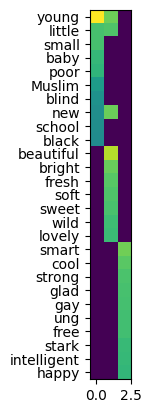

In [19]:
tokens = [
    ['During', 'the', 'siege', ',', 'George', 'Robertson', 'had', 'appointed', 'Shuja-ul-Mulk', ',', 'who', 'was', 'a', 'bright', 'boy', 'only', '12', 'years', 'old', 'and', 'the', 'youngest', 'surviving', 'son', 'of', 'Aman-ul-Mulk', ',', 'as', 'the', 'ruler', 'of', 'Chitral', '.'], 
    ['The', 'roses', 'have', 'grown', 'out', 'of', 'control', ',', 'wild', 'and', 'carefree', ',', 'their', 'bright', 'blooming', 'faces', 'turned', 'to', 'bathe', 'in', 'the', 'early', 'autumn', 'sun', '.'], 
    ['He', 'was', 'bright', 'and', 'independent', 'and', 'proud', '.'],
]

targets = [13, 13, 2]

prob_est1 = XLMRProbEstimatorMultimasked(
        num_masks = 1,
        topk = 10)
preds1 = prob_est1.get_log_probs(tokens, targets)

def plot_ans(preds1):
    plt.imshow(preds1[0].T)
    plt.yticks(np.arange(len(preds1[1])), preds1[1])

plot_ans(preds1)

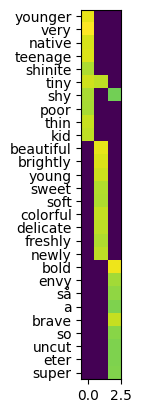

In [21]:
prob_est2 = XLMRProbEstimatorMultimasked(
        num_masks = 2,
        topk = 10)
preds2 = prob_est2.get_log_probs(tokens, targets)
plot_ans(preds2)

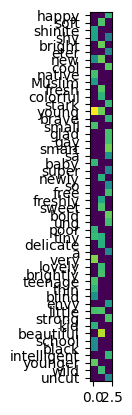

In [22]:
def plot_ans(preds1):
    plt.imshow(preds1[0].T)
    plt.yticks(np.arange(len(preds1[1])), preds1[1])

prob_est_avg = MaxCombiner([prob_est1, prob_est2], merge_vocab_type='union')
preds_avg = prob_est_avg.get_log_probs(tokens, targets)
plot_ans(preds_avg)

In [28]:
bcomb = BCombFasttextCombiner(prob_estimators=[prob_est_avg], 
        k=4.0,
        s=1.00,
        beta=0.0,
        temperature=0.001,
        lang="en")
preds_bcomb = bcomb.get_log_probs(tokens, targets)

d:\science\lexsubgen\tests\subst_generators\../..\lexsubgen\prob_estimators\combiner.py:387: RuntimeWarning: divide by zero encountered in log
  similarity = np.log(softmax(similarity.astype(np.float64) / self.temperature, axis=-1)).astype(np.float32)


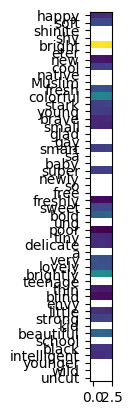

In [29]:
plot_ans(preds_bcomb)

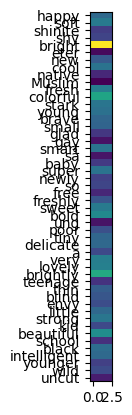

In [25]:
plot_ans([bcomb.fast_text_sim, preds_bcomb[1]])